<a href="https://colab.research.google.com/github/KodumuruRaja/Instance-Based-Algorithms/blob/main/Learning-Vector-Quantization2-(LVQ).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def lvq_fit(train,target,learn_rate,b,max_epoch):
  label,train_idx=np.unique(target,return_index=True)
  weight=train[train_idx].astype(np.float64)
  train=np.array([e for i,e in enumerate(zip(train,target)) if i not in train_idx])
  train,target=train[:,0],train[:,1]
  epoch=0
  while epoch<max_epoch:
    for i,x in enumerate(train):
      distance=[sum((w-x)**2)for w in weight]
      min=np.argmin(distance)
      sign=1 if target[i]==label[min] else -1
      weight[min]+=sign*learn_rate*(x-weight[min])
    learn_rate*=b
    epoch+=1
  return weight,label

In [ ]:
def lvq_predict(x,weight):
  weight,label=weight
  d=[sum((w-x)**2)for w in weight]
  return label[np.argmin(d)]

In [ ]:
train=np.array([[1,1,0,0],
                [0,0,0,1],
                [0,0,1,1],
                [1,0,0,0],
                [0,1,1,0]])
target=np.array([1,2,2,1,2])
weight=lvq_fit(train,target,learn_rate=.1,b=.5,max_epoch=10)
output=lvq_predict([1,0,1,0],weight)
print(output)

1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


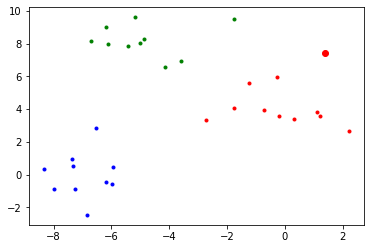

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from random import uniform
train,target=make_blobs(n_samples=30,n_features=2,centers=3)
weight=lvq_fit(train,target,learn_rate=.1,b=.5,max_epoch=10)
test=uniform(train[:,0].min(),train[:,0].max()),uniform(train[:,1].min(),train[:,1].max())
output=lvq_predict(test,weight)
colors='rgbcmyk'
for x,label in zip(train,target):
  plt.plot(x[0],x[1],colors[label]+'.')
plt.plot(test[0],test[1],colors[output]+'o')